# Mushroom Classification Project

## Predicting Mushroom Edibility using Machine Learning

This notebook covers the complete ML pipeline for classifying mushrooms as edible or poisonous based on their characteristics.

## 1. Data Loading & Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
import mplcyberpunk
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use("cyberpunk")
plt.style.use("dark_background")
plt.rcParams["axes.grid"] = False
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Load the dataset
df = pd.read_csv('data/mushroom.csv', sep=';')
df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [3]:
# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [4]:
# Display column names and data types
df.dtypes

class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

In [5]:
# Display statistical summary
df.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


## 2. Exploratory Data Analysis (EDA)

### 2.1 Data Quality Assessment

In [6]:
# Check for missing values
df.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [7]:
# Check for missing values percentages
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
pd.DataFrame({'Missing Count': missing_data, 'Percentage': missing_percent})[missing_data > 0].sort_values(by='Percentage', ascending=False)

,Missing Count,Percentage
veil-type,57892,94.797688
spore-print-color,54715,89.595376
veil-color,53656,87.861272
stem-root,51538,84.393064
stem-surface,38124,62.427746
gill-spacing,25063,41.040462
cap-surface,14120,23.121387
gill-attachment,9884,16.184971
ring-type,2471,4.046243


In [8]:
# Check unique values per column
unique_summary = pd.DataFrame({
    'Column': df.columns,
    'Unique Values': [df[col].nunique() for col in df.columns],
    'Data Type': df.dtypes.values
})
unique_summary

,Column,Unique Values,Data Type
0,class,2,object
1,cap-diameter,2571,float64
2,cap-shape,7,object
3,cap-surface,11,object
4,cap-color,12,object
5,does-bruise-or-bleed,2,object
6,gill-attachment,7,object
7,gill-spacing,3,object
8,gill-color,12,object
9,stem-height,2226,float64


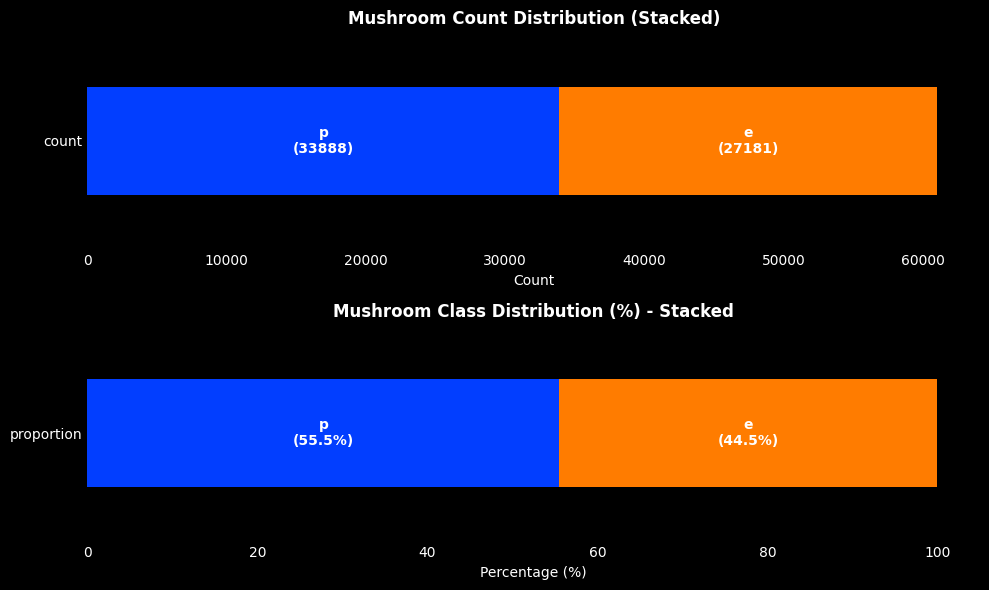

In [9]:
# Analyze the target variable with stacked bars
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,6))

# Get class data
class_counts = df['class'].value_counts()
proportions = df['class'].value_counts(normalize=True) * 100

# Top plot: Stacked horizontal bar with counts
class_data = pd.DataFrame(class_counts).T
class_data.plot(kind='barh', stacked=True, ax=ax1, color=sns.color_palette('bright', 2), legend=False, width=0.5)
ax1.set_title('Mushroom Count Distribution (Stacked)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Count')

# Add value labels on stacked bars
cumsum = 0
for i, class_name in enumerate(class_counts.index):
    value = class_counts[class_name]
    x_pos = cumsum + value / 2
    ax1.text(x_pos, 0, f'{class_name}\n({value})', ha='center', va='center', fontweight='bold', color='white', fontsize=10)
    cumsum += value

# Bottom plot: Stacked horizontal bar with percentages
class_prop = pd.DataFrame(proportions).T
class_prop.plot(kind='barh', stacked=True, ax=ax2, color=sns.color_palette('bright', 2), legend=False, width=0.5)
ax2.set_title('Mushroom Class Distribution (%) - Stacked', fontsize=12, fontweight='bold')
ax2.set_xlabel('Percentage (%)')

# Add value labels on stacked bars
cumsum = 0
for i, class_name in enumerate(proportions.index):
    value = proportions[class_name]
    x_pos = cumsum + value / 2
    ax2.text(x_pos, 0, f'{class_name}\n({value:.1f}%)', ha='center', va='center', fontweight='bold', color='white', fontsize=10)
    cumsum += value

plt.tight_layout()
plt.show()

In [10]:
class_stats = pd.DataFrame({
'Count': df['class'].value_counts(),
'Percentage': df['class'].value_counts(normalize=True) * 100
})
class_stats

,Count,Percentage
class,,
p,33888,55.491329
e,27181,44.508671


In [11]:
# Check for duplicates
duplicates_info = pd.DataFrame({
    'Metric': ['Total rows', 'Duplicate rows', 'Unique rows'],
    'Count': [len(df), df.duplicated().sum(), len(df) - df.duplicated().sum()]
})
duplicates_info

,Metric,Count
0,Total rows,61069
1,Duplicate rows,146
2,Unique rows,60923


In [12]:
# Analyze data types
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

type_summary = pd.DataFrame({
    'Type': ['Numerical', 'Categorical'],
    'Count': [len(numerical_cols), len(categorical_cols)],
    'Columns': [', '.join(numerical_cols) if numerical_cols else 'None', 
                ', '.join(categorical_cols[:3]) + ('...' if len(categorical_cols) > 3 else '')]
})
type_summary

,Type,Count,Columns
0,Numerical,3,"cap-diameter, stem-height, stem-width"
1,Categorical,18,"class, cap-shape, cap-surface..."


In [13]:
# Categorical columns summary
cat_summary = pd.DataFrame({
    'Column': categorical_cols,
    'Unique Values': [df[col].nunique() for col in categorical_cols]
}).sort_values('Unique Values', ascending=False)
cat_summary

,Column,Unique Values
10,stem-color,13
3,cap-color,12
7,gill-color,12
2,cap-surface,11
14,ring-type,8
16,habitat,8
9,stem-surface,8
1,cap-shape,7
15,spore-print-color,7
5,gill-attachment,7


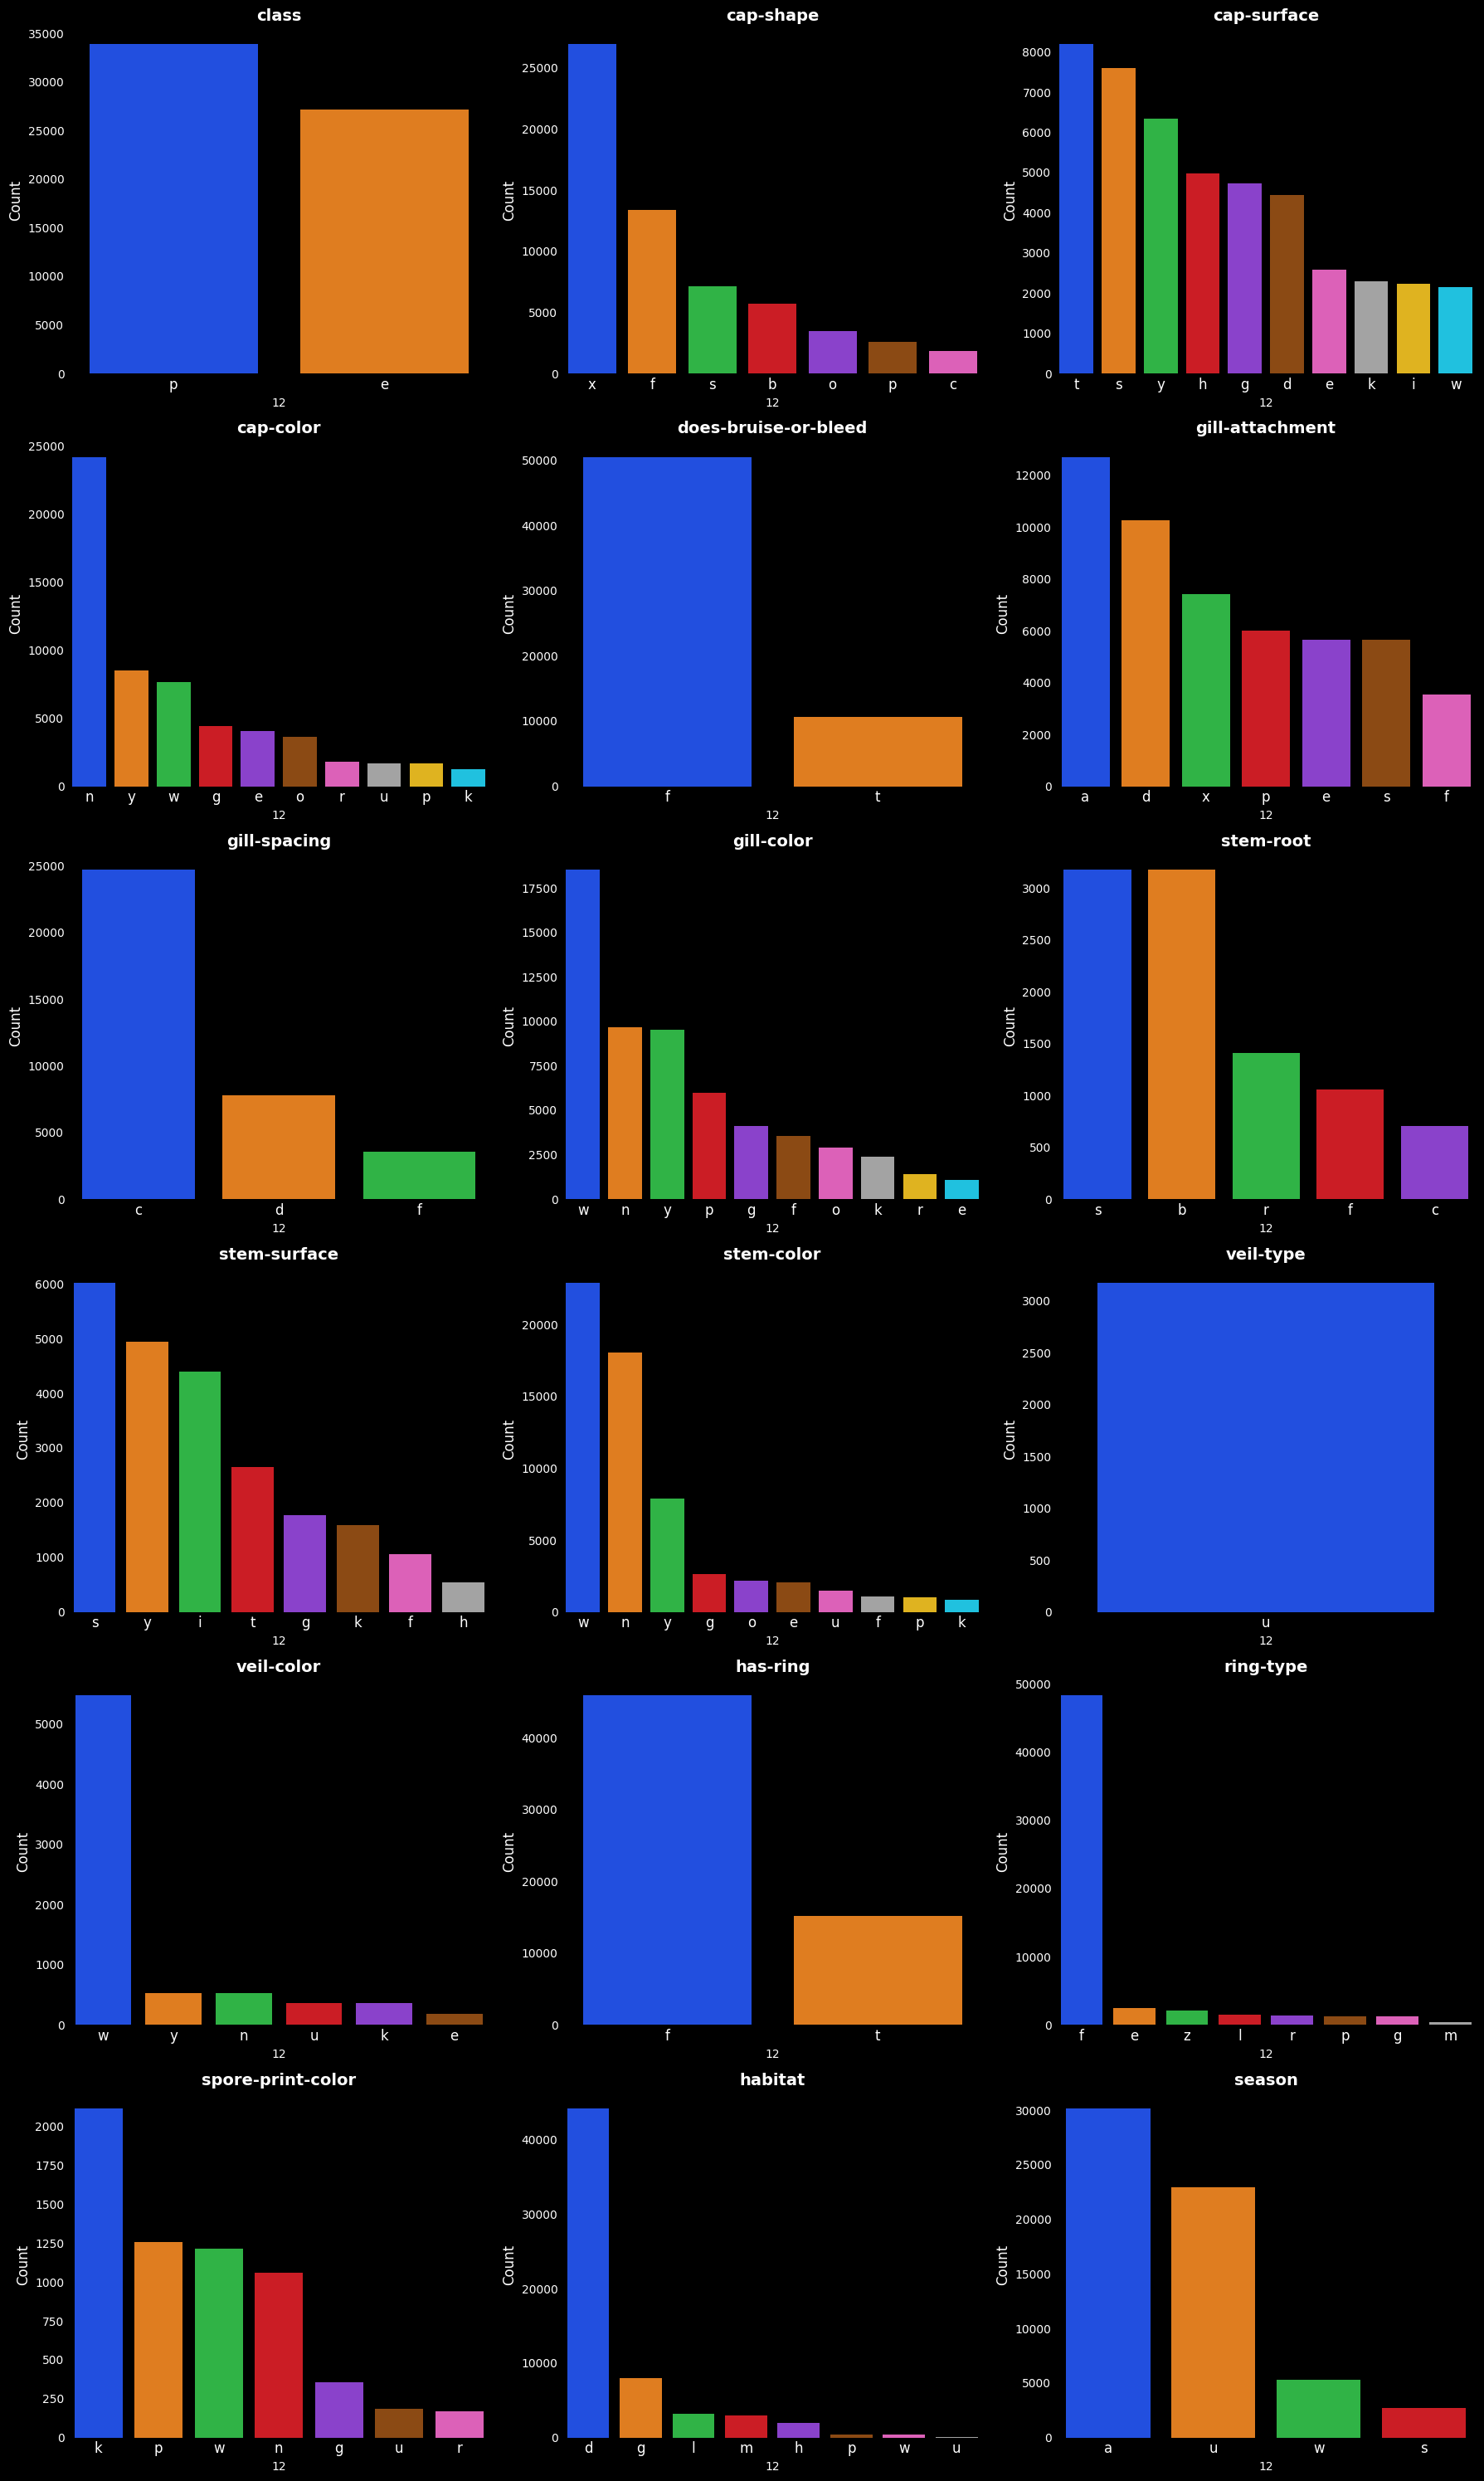

In [14]:
# Visualize distribution of categorical features using countplot
# Calculate grid size dynamically based on number of categorical columns
n_cols = len(categorical_cols)
n_rows = (n_cols + 2) // 3  # Ceiling division to get number of rows needed for 3 columns per row
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5 * n_rows))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[idx], order=df[col].value_counts().head(10).index, palette='bright')
    axes[idx].set_title(f'{col}', fontweight='bold', fontsize=14)
    axes[idx].set_ylabel('Count', fontsize=12)
    axes[idx].set_xlabel('12')
    axes[idx].tick_params(axis='x', labelsize=12)

# Hide empty subplots
for idx in range(n_cols, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

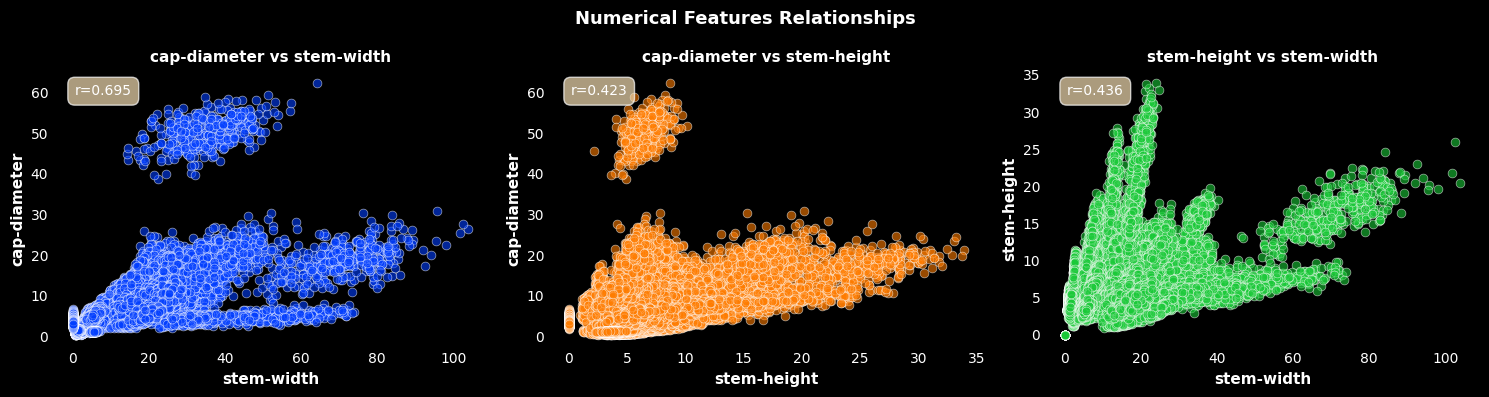

In [15]:
# Scatter plots for numerical features relationships
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Define the pairs to plot
pairs = [
    ('stem-width', 'cap-diameter'),
    ('stem-height', 'cap-diameter'),
    ('stem-width', 'stem-height')
]

for idx, (feat_x, feat_y) in enumerate(pairs):
    ax = axes[idx]
    cyberpunk_colors = sns.color_palette('bright', len(pairs))
    ax.scatter(df[feat_x], df[feat_y], alpha=0.6, s=40, color=cyberpunk_colors[idx], edgecolors='white', linewidth=0.5)
    ax.set_xlabel(feat_x, fontsize=11, fontweight='bold')
    ax.set_ylabel(feat_y, fontsize=11, fontweight='bold')
    ax.set_title(f'{feat_y} vs {feat_x}', fontsize=11, fontweight='bold')
    #ax.grid(True, alpha=0.3)
    
    # Add correlation coefficient
    corr = df[[feat_x, feat_y]].corr().iloc[0, 1]
    ax.text(0.05, 0.95, f'r={corr:.3f}', transform=ax.transAxes, 
           fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7, pad=0.5))

plt.suptitle('Numerical Features Relationships', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

The dataset does not include explicit taxonomic labels such as species or family. However, our plots for numerical features relationships analysis suggests the presence of latent morphological subgroups. These unobserved subpopulations likely correspond to different biological families, each with distinct feature relationships. Therefore, the model must implicitly learn these latent structures in order to accurately predict toxicity.

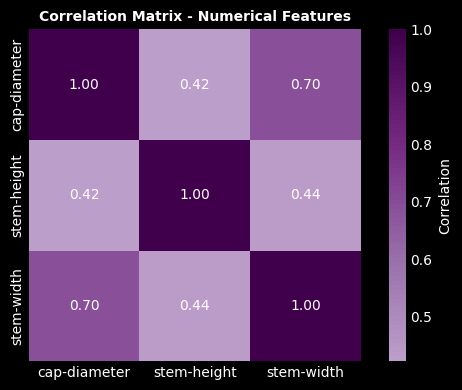

In [16]:
# Correlation heatmap
fig, ax = plt.subplots(figsize=(6, 4))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='PRGn_r', center=0, 
            square=True, ax=ax, cbar_kws={'label': 'Correlation'})
ax.set_title('Correlation Matrix - Numerical Features', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

## Missing Values Analysis - Deep Dive

In [17]:
df_clean = df.copy()

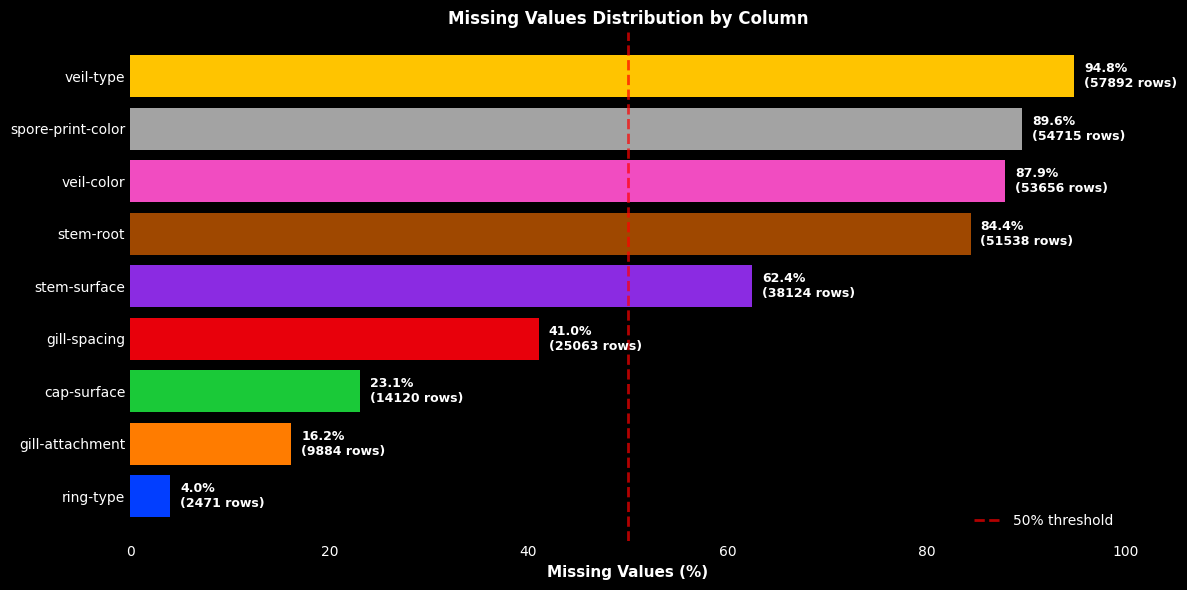

In [18]:
# Detailed missing values analysis by column with visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Calculate missing percentages for columns with nulls
missing_data = df_clean.isnull().sum()
missing_percent = (df_clean.isnull().sum() / len(df_clean)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data[missing_data > 0].index,
    'Missing Count': missing_data[missing_data > 0].values,
    'Percentage': missing_percent[missing_data > 0].values
}).sort_values('Percentage', ascending=True)

# Create horizontal bar chart
colors = sns.color_palette('bright', len(missing_df))
bars = ax.barh(missing_df['Column'], missing_df['Percentage'], color=colors)

# Add percentage labels on bars
for i, (idx, row) in enumerate(missing_df.iterrows()):
    ax.text(row['Percentage'] + 1, i, f"{row['Percentage']:.1f}%\n({int(row['Missing Count'])} rows)", 
            va='center', fontsize=9, fontweight='bold')

ax.set_xlabel('Missing Values (%)', fontsize=11, fontweight='bold')
ax.set_title('Missing Values Distribution by Column', fontsize=12, fontweight='bold')
ax.set_xlim(0, 100)
ax.axvline(x=50, color='red', linestyle='--', linewidth=2, alpha=0.7, label='50% threshold')
ax.legend()
plt.tight_layout()
plt.show()


## Summary of columns with >80% missing values

Before deciding how to handle columns with extreme missingness, we first inventory them. The following cells will identify all columns with >80% missing values and examine their basic characteristics (variance, unique values when present).

In [19]:
# Summary of columns with >80% missing values
cols_over_80_pct = df_clean.isnull().sum()
missing_pct = (df_clean.isnull().sum() / len(df_clean)) * 100
cols_over_80 = cols_over_80_pct[missing_pct > 80]

summary_80_plus = []
for col in cols_over_80.index:
    present_rows = df_clean[df_clean[col].notna()]
    unique_vals = present_rows[col].nunique()
    null_pct = missing_pct[col]
    
    summary_80_plus.append({
        'Column': col,
        'Missing %': f"{null_pct:.1f}%",
        'Unique Values (when present)': unique_vals,
        'Has Variance': 'Yes' if unique_vals > 1 else 'No'
    })

##  Predictive Power of Missing Values

High missingness alone doesn't disqualify a feature—what matters is whether the pattern of missingness carries predictive signal. For each column with >80% missing values, we compare the class distribution when values are **present** versus when they are **missing**. A difference greater than 10 percentage points indicates that the missingness pattern itself may be informative for predicting mushroom edibility.

In [20]:
# ANALYSIS: Predictive Power of Missing Values
print("\n" + "="*80)
print("INVESTIGATING: Which >80% missing columns are actually predictive?")
print("="*80 + "\n")

# Strategy: Compare edibility rates when values are present vs missing
# If the rate differs significantly (>10 pp), the feature carries predictive power

print("Testing each column with >80% missing values...\n")

# Analyze ALL high-missing columns
cols_with_high_missing = ['spore-print-color', 'stem-root', 'veil-color', 'veil-type']
analysis_results = []

for col in cols_with_high_missing:
    print(f"{'─'*80}")
    print(f"📊 Analyzing: {col}")
    print(f"{'─'*80}")
    
    # When present
    present = df_clean[df_clean[col].notna()]
    present_edible = (present['class'] == 'e').sum()
    present_total = len(present)
    present_pct = (present_edible / present_total) * 100 if present_total > 0 else 0
    
    print(f"\nWhen PRESENT ({present_total} rows):")
    print(f"  - {present_pct:.1f}% EDIBLE")
    print(f"  - {100-present_pct:.1f}% POISONOUS")
    
    # When missing
    missing = df_clean[df_clean[col].isnull()]
    missing_edible = (missing['class'] == 'e').sum()
    missing_total = len(missing)
    missing_pct = (missing_edible / missing_total) * 100 if missing_total > 0 else 0
    
    print(f"\nWhen MISSING ({missing_total} rows):")
    print(f"  - {missing_pct:.1f}% EDIBLE")
    print(f"  - {100-missing_pct:.1f}% POISONOUS")
    
    # Calculate difference
    diff = abs(present_pct - missing_pct)
    print(f"\n{'─'*80}")
    print(f"DIFFERENCE: {diff:.1f} percentage points")
    
    # Determine if predictive
    is_predictive = diff > 10
    threshold_flag = "✅ HIGHLY PREDICTIVE" if is_predictive else "⚠️ NOT SIGNIFICANT"
    print(f"{threshold_flag} (threshold: >10 pp)")
    print(f"{'─'*80}\n")
    
    analysis_results.append({
        'Column': col,
        'Present Edible %': f"{present_pct:.1f}%",
        'Missing Edible %': f"{missing_pct:.1f}%",
        'Difference': f"{diff:.1f} pp",
        'Predictive (>10pp)': '✅ Yes' if is_predictive else '✓ No'
    })



INVESTIGATING: Which >80% missing columns are actually predictive?

Testing each column with >80% missing values...

────────────────────────────────────────────────────────────────────────────────
📊 Analyzing: spore-print-color
────────────────────────────────────────────────────────────────────────────────

When PRESENT (6354 rows):
  - 27.8% EDIBLE
  - 72.2% POISONOUS

When MISSING (54715 rows):
  - 46.5% EDIBLE
  - 53.5% POISONOUS

────────────────────────────────────────────────────────────────────────────────
DIFFERENCE: 18.7 percentage points
✅ HIGHLY PREDICTIVE (threshold: >10 pp)
────────────────────────────────────────────────────────────────────────────────

────────────────────────────────────────────────────────────────────────────────
📊 Analyzing: stem-root
────────────────────────────────────────────────────────────────────────────────

When PRESENT (9531 rows):
  - 37.0% EDIBLE
  - 63.0% POISONOUS

When MISSING (51538 rows):
  - 45.9% EDIBLE
  - 54.1% POISONOUS

──────

In [21]:
summary_80_df = pd.DataFrame(summary_80_plus)
print("="*80)
print("COLUMNS WITH >80% MISSING VALUES - SUMMARY")
print("="*80 + "\n")
print(summary_80_df.to_string(index=False))
print("\n" + "="*80)


# Summary table
print("\n" + "="*80)
print("SUMMARY TABLE - PREDICTIVE POWER OF HIGH-MISSING COLUMNS")
print("="*80 + "\n")
results_df = pd.DataFrame(analysis_results)
print(results_df.to_string(index=False))

COLUMNS WITH >80% MISSING VALUES - SUMMARY

           Column Missing %  Unique Values (when present) Has Variance
        stem-root     84.4%                             5          Yes
        veil-type     94.8%                             1           No
       veil-color     87.9%                             6          Yes
spore-print-color     89.6%                             7          Yes


SUMMARY TABLE - PREDICTIVE POWER OF HIGH-MISSING COLUMNS

           Column Present Edible % Missing Edible % Difference Predictive (>10pp)
spore-print-color            27.8%            46.5%    18.7 pp              ✅ Yes
        stem-root            37.0%            45.9%     8.9 pp               ✓ No
       veil-color            42.9%            44.7%     1.9 pp               ✓ No
        veil-type            33.3%            45.1%    11.8 pp              ✅ Yes


Several categorical features exhibited more than 80% missing values and were evaluated individually before removal. Although veil-type shows a difference greater than 10 percentage points between present and missing values, it contains no variance when present (single unique value), which limits its discriminative capacity. Similarly, stem-root and veil-color display limited separation between classes when present versus missing, indicating weak or unstable predictive signal. Given their high missingness, low effective variance, and minimal contribution to class separation, these features were excluded from the final model to reduce noise and unnecessary complexity. In contrast, spore-print-color was retained due to its consistently strong and meaningful association between missingness and the target variable.

## 3. Data Cleaning

In [22]:
# Create a copy for cleaning
df_clean = df.copy()
print(f"Starting with {len(df_clean):,} rows and {df_clean.shape[1]} columns")

Starting with 61,069 rows and 21 columns


We'll remove duplicated records

In [23]:
# Remove duplicate rows
duplicates_before = len(df_clean)
df_clean = df_clean.drop_duplicates()
duplicates_removed = duplicates_before - len(df_clean)
print(f"Removed {duplicates_removed} duplicate rows | New shape: {df_clean.shape}")

Removed 146 duplicate rows | New shape: (60923, 21)


Also, during EDA, we've identified one feature that has only one value. Since it doesn't vary, it won't add any predictive power to our model. According to the dataset [docs](https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset), "u" stands for universal, meaning all mushrooms share the same value, so we won't lose any information by removing it

In [24]:
df_clean['veil-type'].isnull().sum()

np.int64(57746)

In [25]:
df_clean['veil-type'].value_counts()

veil-type
u    3177
Name: count, dtype: int64

In [26]:
df_clean.drop('veil-type', axis=1, inplace=True)

Now let's deal with null values

In [27]:
# Check for missing values percentages
missing_data = df_clean.isnull().sum()
missing_percent = (df_clean.isnull().sum() / len(df_clean)) * 100
pd.DataFrame({'Missing Count': missing_data, 'Percentage': missing_percent})[missing_data > 0].sort_values(by='Percentage', ascending=False)

,Missing Count,Percentage
spore-print-color,54597,89.616401
veil-color,53510,87.832182
stem-root,51536,84.592026
stem-surface,38122,62.574069
gill-spacing,25062,41.137173
cap-surface,14120,23.176797
gill-attachment,9855,16.176157
ring-type,2471,4.055939


### 3.3 Feature Engineering - Missing Value Indicators

In [28]:
# CREATE PRESENCE INDICATOR FOR SPORE-PRINT-COLOR
print("\n" + "="*80)
print("FEATURE ENGINEERING: Creating Missing Value Indicator")
print("="*80 + "\n")

# Create indicator for spore-print-color presence
df_clean['spore_print_color_present'] = (~df_clean['spore-print-color'].isnull()).astype(int)

print("✓ Created: spore_print_color_present")
print(f"  - Value 1: spore-print-color is present (has observation)")
print(f"  - Value 0: spore-print-color is missing (no observation)")
print(f"\nDistribution:")
print(df_clean['spore_print_color_present'].value_counts().to_string())

# Now drop the original column
df_clean.drop('spore-print-color', axis=1, inplace=True)
print(f"\n✓ Dropped: spore-print-color (original column)")
print(f"\nReason: Preserves predictive signal of PRESENCE/ABSENCE")
print(f"        without forcing imputation of 89.6% missing values")
print("="*80)


FEATURE ENGINEERING: Creating Missing Value Indicator

✓ Created: spore_print_color_present
  - Value 1: spore-print-color is present (has observation)
  - Value 0: spore-print-color is missing (no observation)

Distribution:
spore_print_color_present
0    54597
1     6326

✓ Dropped: spore-print-color (original column)

Reason: Preserves predictive signal of PRESENCE/ABSENCE
        without forcing imputation of 89.6% missing values


**Spore-print-color** showed a 18.7 percentage point difference between when present (27.8% edible) and when missing (46.5% edible). This strong signal suggests that whether or not a mushroom's spore-print color was recorded is informative about its edibility. Rather than losing this information through imputation or discarding the column entirely, we extract the predictive signal by creating a binary indicator variable: `spore_print_color_present`. This preserves the pattern without forcing unreliable value reconstruction.

In [29]:
# HANDLE OTHER HIGH-MISSING COLUMNS
print("\n" + "="*80)
print("HANDLING OTHER COLUMNS WITH >80% MISSING")
print("="*80 + "\n")

cols_to_drop_no_indicator = ['stem-root', 'veil-color']

print(f"Dropping {len(cols_to_drop_no_indicator)} column(s) WITHOUT creating indicators:")
print("(Not predictive enough - <10 pp difference)\n")

for col in cols_to_drop_no_indicator:
    if col in df_clean.columns:
        df_clean.drop(col, axis=1, inplace=True)
        print(f"✓ Dropped: {col}")

print("\n" + "="*80)
print(f"Current dataset shape: {df_clean.shape}")
print("="*80)


HANDLING OTHER COLUMNS WITH >80% MISSING

Dropping 2 column(s) WITHOUT creating indicators:
(Not predictive enough - <10 pp difference)

✓ Dropped: stem-root
✓ Dropped: veil-color

Current dataset shape: (60923, 18)


### 3.4 Remaining Missing Values - Imputation Strategy

For the remaining features with <80% missing values, we apply targeted imputation strategies: categorical features are filled with an explicit 'Unknown' category (which tree-based models can learn to use), while numerical features are imputed using the median (a robust statistic resistant to outliers).

In [30]:
# IMPUTATION STRATEGY FOR REMAINING MISSING VALUES
print("\n" + "="*80)
print("IMPUTATION STRATEGY FOR <80% MISSING VALUES")
print("="*80 + "\n")

missing_data = df_clean.isnull().sum()
missing_percent = (df_clean.isnull().sum() / len(df_clean)) * 100

cols_with_nulls = df_clean.columns[missing_data > 0].tolist()

if len(cols_with_nulls) == 0:
    print("✓ No columns with missing values remaining!")
else:
    print(f"Found {len(cols_with_nulls)} column(s) with missing values:\n")
    
    for col in cols_with_nulls:
        null_count = missing_data[col]
        null_pct = missing_percent[col]
        
        print(f"{col}:")
        print(f"  Missing: {null_count} rows ({null_pct:.2f}%)")
        
        if df_clean[col].dtype == 'object':
            print(f"  Type: Categorical")
            print(f"  Strategy: Fill with 'Unknown'")
            df_clean[col].fillna('Unknown', inplace=True)
            print(f"  ✓ Applied\n")
        else:
            print(f"  Type: Numerical")
            median_val = df_clean[col].median()
            print(f"  Strategy: Fill with median = {median_val:.2f}")
            df_clean[col].fillna(median_val, inplace=True)
            print(f"  ✓ Applied\n")

# Verify
remaining_nulls = df_clean.isnull().sum().sum()
print("="*80)
print(f"✅ VERIFICATION: {remaining_nulls} null values remain")
print(f"Final dataset shape: {df_clean.shape}")
print("="*80)


IMPUTATION STRATEGY FOR <80% MISSING VALUES

Found 5 column(s) with missing values:

cap-surface:
  Missing: 14120 rows (23.18%)
  Type: Categorical
  Strategy: Fill with 'Unknown'
  ✓ Applied

gill-attachment:
  Missing: 9855 rows (16.18%)
  Type: Categorical
  Strategy: Fill with 'Unknown'
  ✓ Applied

gill-spacing:
  Missing: 25062 rows (41.14%)
  Type: Categorical
  Strategy: Fill with 'Unknown'
  ✓ Applied

stem-surface:
  Missing: 38122 rows (62.57%)
  Type: Categorical
  Strategy: Fill with 'Unknown'
  ✓ Applied

ring-type:
  Missing: 2471 rows (4.06%)
  Type: Categorical
  Strategy: Fill with 'Unknown'
  ✓ Applied

✅ VERIFICATION: 0 null values remain
Final dataset shape: (60923, 18)


### 3.5 Data Cleaning Summary

In [31]:
# COMPREHENSIVE CLEANING SUMMARY
print("\n" + "="*80)
print("COMPREHENSIVE DATA CLEANING SUMMARY")
print("="*80 + "\n")

summary_stats = {
    'Original Dataset': {
        'Rows': len(df),
        'Columns': df.shape[1],
        'Null Values': df.isnull().sum().sum()
    },
    'After Cleaning': {
        'Rows': len(df_clean),
        'Columns': df_clean.shape[1],
        'Null Values': df_clean.isnull().sum().sum()
    }
}

print("ROWS & COLUMNS:")
print(f"  Original: {summary_stats['Original Dataset']['Rows']:,} rows × {summary_stats['Original Dataset']['Columns']} columns")
print(f"  Cleaned:  {summary_stats['After Cleaning']['Rows']:,} rows × {summary_stats['After Cleaning']['Columns']} columns")
print(f"  Removed:  {summary_stats['Original Dataset']['Rows'] - summary_stats['After Cleaning']['Rows']} rows (duplicates)")
print(f"  Dropped:  {summary_stats['Original Dataset']['Columns'] - summary_stats['After Cleaning']['Columns']} columns")
print(f"  Data retained: {(summary_stats['After Cleaning']['Rows'] / summary_stats['Original Dataset']['Rows']) * 100:.2f}%")

print("\nNULL VALUES:")
print(f"  Before: {summary_stats['Original Dataset']['Null Values']:,}")
print(f"  After:  {summary_stats['After Cleaning']['Null Values']}")

print("\nFEATURE ENGINEERING:")
print(f"  ✓ Created: spore_print_color_present (indicator variable)")
print(f"  ✓ Justification: 18.7 pp difference in edibility % (highly predictive)")

print("\nREADY FOR MODELING:")
print(f"  ✅ No null values remaining")
print(f"  ✅ Feature set: {list(df_clean.columns[:5])}... (total {df_clean.shape[1]} features)")
print("="*80 + "\n")


COMPREHENSIVE DATA CLEANING SUMMARY

ROWS & COLUMNS:
  Original: 61,069 rows × 21 columns
  Cleaned:  60,923 rows × 18 columns
  Removed:  146 rows (duplicates)
  Dropped:  3 columns
  Data retained: 99.76%

NULL VALUES:
  Before: 307,463
  After:  0

FEATURE ENGINEERING:
  ✓ Created: spore_print_color_present (indicator variable)
  ✓ Justification: 18.7 pp difference in edibility % (highly predictive)

READY FOR MODELING:
  ✅ No null values remaining
  ✅ Feature set: ['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color']... (total 18 features)



## 4. Model Training & Evaluation

### 4.1 Data Preparation for Modeling

Before training models, we must encode categorical variables into numerical format, as scikit-learn algorithms require numerical input. We'll use label encoding for categorical features and then split the data into training and testing sets for model evaluation.

In [33]:
# DATA PREPARATION FOR MODELING
print("\n" + "="*80)
print("DATA PREPARATION: Encoding & Splitting")
print("="*80 + "\n")

# Create a copy for modeling
df_model = df_clean.copy()

# Separate target from features
y = df_model['class'].copy()
X = df_model.drop('class', axis=1).copy()

# Identify categorical and numerical columns (AFTER separating target)
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()

print(f"Categorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}\n")

# Encode target variable
from sklearn.preprocessing import LabelEncoder
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)
print(f"✓ Encoded target 'class': {dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))}")

# Apply OneHotEncoder to categorical features
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_cat_encoded = ohe.fit_transform(X[categorical_cols])

# Get feature names after encoding
cat_feature_names = ohe.get_feature_names_out(categorical_cols)
print(f"\n✓ OneHotEncoder applied to {len(categorical_cols)} categorical features")
print(f"  Generated {len(cat_feature_names)} binary features")

# Combine encoded categorical with numerical features
X_encoded = np.hstack([X_cat_encoded, X[numerical_cols].values])
feature_names = np.concatenate([cat_feature_names, numerical_cols])

print(f"\n✓ Final feature matrix shape: {X_encoded.shape}")
print(f"  {len(cat_feature_names)} encoded categorical + {len(numerical_cols)} numerical = {len(feature_names)} total features")

# Create a DataFrame with encoded features for easier manipulation
X_processed = pd.DataFrame(X_encoded, columns=feature_names)
print(f"\nData types after encoding:\n{X_processed.dtypes.value_counts()}")



DATA PREPARATION: Encoding & Splitting

Categorical columns: ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-surface', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season']
Numerical columns: ['cap-diameter', 'stem-height', 'stem-width', 'spore_print_color_present']

✓ Encoded target 'class': {'e': np.int64(0), 'p': np.int64(1)}

✓ OneHotEncoder applied to 13 categorical features
  Generated 102 binary features

✓ Final feature matrix shape: (60923, 106)
  102 encoded categorical + 4 numerical = 106 total features

Data types after encoding:
float64    106
Name: count, dtype: int64


In [34]:
# TRAIN-TEST SPLIT
print("\n" + "="*80)
print("TRAIN-TEST SPLIT")
print("="*80 + "\n")

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Training set size: {len(X_train)} samples ({len(X_train)/len(X_processed)*100:.1f}%)")
print(f"Testing set size: {len(X_test)} samples ({len(X_test)/len(X_processed)*100:.1f}%)")
print(f"\nFeature count: {X_train.shape[1]}")
print(f"\nClass distribution in training set:")
print(f"  Edible (1): {(y_train == 1).sum()} samples ({(y_train == 1).sum()/len(y_train)*100:.1f}%)")
print(f"  Poisonous (0): {(y_train == 0).sum()} samples ({(y_train == 0).sum()/len(y_train)*100:.1f}%)")
print(f"\nClass distribution in testing set:")
print(f"  Edible (1): {(y_test == 1).sum()} samples ({(y_test == 1).sum()/len(y_test)*100:.1f}%)")
print(f"  Poisonous (0): {(y_test == 0).sum()} samples ({(y_test == 0).sum()/len(y_test)*100:.1f}%)")



TRAIN-TEST SPLIT

Training set size: 48738 samples (80.0%)
Testing set size: 12185 samples (20.0%)

Feature count: 106

Class distribution in training set:
  Edible (1): 26993 samples (55.4%)
  Poisonous (0): 21745 samples (44.6%)

Class distribution in testing set:
  Edible (1): 6749 samples (55.4%)
  Poisonous (0): 5436 samples (44.6%)


### 4.2 Model Training with Hyperparameter Tuning

We will train four scikit-learn models with different paradigms to classify mushroom edibility:

1. **Logistic Regression**: A linear probabilistic model that learns decision boundaries in feature space. With OneHotEncoding, it can capture complex interactions.
2. **Decision Tree**: A simple tree-based model that creates explicit if-then-else decision rules. Serves as a baseline for ensemble methods.
3. **Random Forest**: An ensemble of parallel decision trees that reduces overfitting and captures non-linear patterns through aggregation.
4. **Gradient Boosting**: A sequential ensemble that iteratively improves predictions by learning from previous errors, typically achieving high accuracy.

**Hyperparameter Optimization**: Before training the final models, we optimize hyperparameters using GridSearchCV with 5-fold cross-validation on the training set. For each model, we test a modest range of key parameters to balance computational efficiency with performance gains.

**Model Evaluation**: After tuning, we train the final models using the best hyperparameters found during grid search. These optimized models will be evaluated on the test set using multiple metrics: accuracy, precision, recall, and F1-score.

All models will use OneHotEncoded features and be trained on the same train-test split for fair comparison.

In [40]:
print("\n" + "="*80)
print("HYPERPARAMETER TUNING - GRID SEARCH")
print("="*80 + "\n")

# LOGISTIC REGRESSION TUNING
print("Tuning: Logistic Regression")
lr_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}
lr_grid = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), 
                       lr_params, cv=5, n_jobs=-1, scoring='f1')
lr_grid.fit(X_train, y_train)
print(f"  Best params: {lr_grid.best_params_}")
print(f"  Best CV F1-Score: {lr_grid.best_score_:.4f}\n")

# DECISION TREE TUNING
print("Tuning: Decision Tree")
dt_params = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                       dt_params, cv=5, n_jobs=-1, scoring='f1')
dt_grid.fit(X_train, y_train)
print(f"  Best params: {dt_grid.best_params_}")
print(f"  Best CV F1-Score: {dt_grid.best_score_:.4f}\n")

# RANDOM FOREST TUNING
print("Tuning: Random Forest")
rf_params = {
    'n_estimators': [100, 150],
    'max_depth': [10, 12, 15],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt']
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1), 
                       rf_params, cv=5, n_jobs=-1, scoring='f1')
rf_grid.fit(X_train, y_train)
print(f"  Best params: {rf_grid.best_params_}")
print(f"  Best CV F1-Score: {rf_grid.best_score_:.4f}\n")

# GRADIENT BOOSTING TUNING
print("Tuning: Gradient Boosting")
gb_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}
gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                       gb_params, cv=5, n_jobs=-1, scoring='f1')
gb_grid.fit(X_train, y_train)
print(f"  Best params: {gb_grid.best_params_}")
print(f"  Best CV F1-Score: {gb_grid.best_score_:.4f}\n")

print("="*80)
print("✅ Hyperparameter tuning completed\n")



HYPERPARAMETER TUNING - GRID SEARCH

Tuning: Logistic Regression
  Best params: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
  Best CV F1-Score: 0.8427

Tuning: Decision Tree
  Best params: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}
  Best CV F1-Score: 0.9691

Tuning: Random Forest
  Best params: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
  Best CV F1-Score: 0.9997

Tuning: Gradient Boosting
  Best params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
  Best CV F1-Score: 0.9995

✅ Hyperparameter tuning completed



In [45]:
# MODEL 1: LOGISTIC REGRESSION (with best hyperparameters)
print("\n" + "="*80)
print("MODEL 1: LOGISTIC REGRESSION (Optimized)")
print("="*80 + "\n")

lr_model = lr_grid.best_estimator_

lr_train_pred = lr_model.predict(X_train)
lr_test_pred = lr_model.predict(X_test)

lr_train_acc = accuracy_score(y_train, lr_train_pred)
lr_test_acc = accuracy_score(y_test, lr_test_pred)

print(f"Best Hyperparameters: {lr_grid.best_params_}")
print(f"\nTraining Accuracy: {lr_train_acc:.4f}")
print(f"Testing Accuracy:  {lr_test_acc:.4f}")
print(f"Precision: {precision_score(y_test, lr_test_pred):.4f}")
print(f"Recall: {recall_score(y_test, lr_test_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, lr_test_pred):.4f}")

print(f"\nConfusion Matrix:")
print(confusion_matrix(y_test, lr_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, lr_test_pred))



MODEL 1: LOGISTIC REGRESSION (Optimized)

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

Training Accuracy: 0.8295
Testing Accuracy:  0.8291
Precision: 0.8537
Recall: 0.8343
F1-Score: 0.8439

Confusion Matrix:
[[4471  965]
 [1118 5631]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      5436
           1       0.85      0.83      0.84      6749

    accuracy                           0.83     12185
   macro avg       0.83      0.83      0.83     12185
weighted avg       0.83      0.83      0.83     12185



In [46]:
# MODEL 3: RANDOM FOREST (with best hyperparameters)
print("\n" + "="*80)
print("MODEL 3: RANDOM FOREST (Optimized)")
print("="*80 + "\n")

rf_model = rf_grid.best_estimator_

rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

rf_train_acc = accuracy_score(y_train, rf_train_pred)
rf_test_acc = accuracy_score(y_test, rf_test_pred)

print(f"Best Hyperparameters: {rf_grid.best_params_}")
print(f"\nTraining Accuracy: {rf_train_acc:.4f}")
print(f"Testing Accuracy:  {rf_test_acc:.4f}")
print(f"Precision: {precision_score(y_test, rf_test_pred):.4f}")
print(f"Recall: {recall_score(y_test, rf_test_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, rf_test_pred):.4f}")

print(f"\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, rf_test_pred))

# Feature importance
print("\nTop 10 Most Important Features:")
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False).head(10)
print(feature_importance.to_string(index=False))



MODEL 3: RANDOM FOREST (Optimized)

Best Hyperparameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}

Training Accuracy: 0.9998
Testing Accuracy:  0.9998
Precision: 0.9997
Recall: 1.0000
F1-Score: 0.9999

Confusion Matrix:
[[5434    2]
 [   0 6749]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5436
           1       1.00      1.00      1.00      6749

    accuracy                           1.00     12185
   macro avg       1.00      1.00      1.00     12185
weighted avg       1.00      1.00      1.00     12185


Top 10 Most Important Features:
             Feature  Importance
          stem-width    0.085410
         stem-height    0.054601
        cap-diameter    0.052832
        stem-color_w    0.034687
      gill-spacing_d    0.027828
   gill-attachment_p    0.024485
stem-surface_Unknown    0.022288
      gill-spacing_c    0.021756


In [47]:
# MODEL 2: DECISION TREE (with best hyperparameters)
print("\n" + "="*80)
print("MODEL 2: DECISION TREE (Optimized)")
print("="*80 + "\n")

dt_model = dt_grid.best_estimator_

dt_train_pred = dt_model.predict(X_train)
dt_test_pred = dt_model.predict(X_test)

dt_train_acc = accuracy_score(y_train, dt_train_pred)
dt_test_acc = accuracy_score(y_test, dt_test_pred)

print(f"Best Hyperparameters: {dt_grid.best_params_}")
print(f"\nTraining Accuracy: {dt_train_acc:.4f}")
print(f"Testing Accuracy:  {dt_test_acc:.4f}")
print(f"Precision: {precision_score(y_test, dt_test_pred):.4f}")
print(f"Recall: {recall_score(y_test, dt_test_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, dt_test_pred):.4f}")

print(f"\nConfusion Matrix:")
print(confusion_matrix(y_test, dt_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, dt_test_pred))

# Feature importance
print("\nTop 10 Most Important Features:")
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False).head(10)
print(feature_importance.to_string(index=False))



MODEL 2: DECISION TREE (Optimized)

Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}

Training Accuracy: 0.9613
Testing Accuracy:  0.9584
Precision: 0.9959
Recall: 0.9287
F1-Score: 0.9611

Confusion Matrix:
[[5410   26]
 [ 481 6268]]

Classification Report:


              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5436
           1       1.00      0.93      0.96      6749

    accuracy                           0.96     12185
   macro avg       0.96      0.96      0.96     12185
weighted avg       0.96      0.96      0.96     12185


Top 10 Most Important Features:
                  Feature  Importance
               stem-width    0.121905
              stem-height    0.049773
           gill-spacing_d    0.046948
             gill-color_p    0.038566
             cap-diameter    0.032049
           stem-surface_s    0.030474
     stem-surface_Unknown    0.028871
spore_print_color_present    0.028249
           stem-surface_g    0.027203
              ring-type_z    0.026468


In [48]:
# MODEL 4: GRADIENT BOOSTING (with best hyperparameters)
print("\n" + "="*80)
print("MODEL 4: GRADIENT BOOSTING (Optimized)")
print("="*80 + "\n")

gb_model = gb_grid.best_estimator_

gb_train_pred = gb_model.predict(X_train)
gb_test_pred = gb_model.predict(X_test)

gb_train_acc = accuracy_score(y_train, gb_train_pred)
gb_test_acc = accuracy_score(y_test, gb_test_pred)

print(f"Best Hyperparameters: {gb_grid.best_params_}")
print(f"\nTraining Accuracy: {gb_train_acc:.4f}")
print(f"Testing Accuracy:  {gb_test_acc:.4f}")
print(f"Precision: {precision_score(y_test, gb_test_pred):.4f}")
print(f"Recall: {recall_score(y_test, gb_test_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, gb_test_pred):.4f}")

print(f"\nConfusion Matrix:")
print(confusion_matrix(y_test, gb_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, gb_test_pred))

# Feature importance
print("\nTop 10 Most Important Features:")
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False).head(10)
print(feature_importance.to_string(index=False))



MODEL 4: GRADIENT BOOSTING (Optimized)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}

Training Accuracy: 0.9996
Testing Accuracy:  0.9990
Precision: 0.9994
Recall: 0.9988
F1-Score: 0.9991

Confusion Matrix:
[[5432    4]
 [   8 6741]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5436
           1       1.00      1.00      1.00      6749

    accuracy                           1.00     12185
   macro avg       1.00      1.00      1.00     12185
weighted avg       1.00      1.00      1.00     12185


Top 10 Most Important Features:
               Feature  Importance
            stem-width    0.133703
           stem-height    0.062718
        gill-spacing_d    0.045714
          cap-diameter    0.042711
          stem-color_w    0.039354
     gill-attachment_p    0.039344
        stem-surface_s    0.027137
          gill-color_w    0.024985
does-bruise-or-bleed_f    0.0